In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

Bu çalışmada NBA oyuncularına ait fiziksel özellikleri, oyuncuların temel oyun içi istatistikleri ve draft bilgileri bulunan bir veriseti kullanılmıştır. Veriseti 1996-2009 sezonları arasını kapsamaktadır. Çalışmadaki amaç, oyuncuların istatistikleri ve draft edildikleri sıra dikkate alınarak, takımların ne denli başarılı bir draft süreci geçirdiğini, aynı zamanda takımların draftta oyuncuların fiziksel özelliklerini ne kadar dikkate aldıklarını analiz etmektir.
Değişken isimlerinin tanımları aşağıdaki gibidir:


1.   player_name: Oyuncu ismi
2.   team_abbreviation: Takım isminin kısaltması
3.   age: Yaş
4.   player_height: Oyuncunun boyu (cm)
5.   player_weight: Oyuncunun
6.   college: Oyuncunun okuduğu üniversite
7.   country: Oyuncunun ülkesi
8.   draft_year: Oyuncunun draft olduğu sene
9.   draft_round: Oyuncunun draft edildiği round
10.  draft_number: Oyuncunun dıraft edildiği sıra gp pts reb ast 
11.  gp: Süre aldığı maç sayısı
12.  pts: Oyuncunun attığı sayı ortalaması
13.  reb: Oyuncunun aldığı rebound ortalaması
14.  ast: Oyuncunun yaptığı asist ortalaması
15.  net_rating: Oyuncunun ortalama rating'i
16.  oreb_pct: Hücum rebound yüzdesi
17.  dreb_pct: Savunma reboundu yüzdesi
18.  usg_pct: Takım oyunu yüzdesi ((FGA + Possession Ending FTA + TO) / POSS)
19.  ts_pct: Şut verimliliği
20.  ast_pct: Asist yüzdesi
21.  season: Sezon



In [4]:
df = pd.read_csv('all_seasons.csv')

In [5]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [6]:
df.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

Görüldüğü üzere verisetinde herhangi bir kayıp gözlem bulunmamaktadır.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11700.0,5849.500000,3377.643409,0.000000,2924.7500,5849.50000,8774.25000,11699.00000
age,11700.0,27.131966,4.340006,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,11700.0,200.728501,9.169827,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,11700.0,100.526791,12.526481,60.327736,90.7184,99.79024,108.86208,163.29312
gp,11700.0,51.717179,24.985236,1.000000,32.0000,58.00000,74.00000,85.00000
pts,11700.0,8.169299,5.956115,0.000000,3.6000,6.70000,11.50000,36.10000
reb,11700.0,3.564957,2.487498,0.000000,1.8000,3.00000,4.70000,16.30000
ast,11700.0,1.811179,1.792117,0.000000,0.6000,1.20000,2.40000,11.70000
net_rating,11700.0,-2.166410,12.076914,-200.000000,-6.3000,-1.30000,3.20000,300.00000
oreb_pct,11700.0,0.054981,0.043595,0.000000,0.0210,0.04200,0.08400,1.00000


Numeric değişkenlere ait tanımlayıcı istatistiklere bakıldığında, anormal sonuç olarak net_rating değişkeni görülmektedir. Net rating, oyuncunun maç içinde verimliliğini ölçen bir istatistiktir. Negatif ve pozitif değerler alabilmektedir fakat -200 ya da +300 gibi sonuçlar, bu değişken için oldukça anlamsızdır. Bu sonuçlara ait gözlemleri bulup, verisetinden çıkarılması analizin ileriki aşamaları için yararlı olacaktır.

In [8]:
outlier = ['gp','player_name','season','net_rating']
df.loc[bball.net_rating==300.0,outlier]

,gp,player_name,season,net_rating
275,1,Bruce Bowen,1996-97,300.0


In [9]:
outlier2 = ['gp','player_name','season','net_rating']
df.loc[bball.net_rating==-200.0,outlier2]

,gp,player_name,season,net_rating
953,1,Gheorghe Muresan,1998-99,-200.0


In [10]:
df.drop([275,953],axis=0,inplace=True)

Bu aykırı değerlerin Bruce Bowen ve Gheroghe Muresan'a ait sonuçlar olduğu görülmektedir. Oynadıkları maç sayısının da 1 olduğu ve çıkan sonucun anlamsız olduğu rahatlıkla ifade edilebilir. Bu gözlemler verisetinden çıkarılmıştır.

In [11]:
df.drop(df[df.gp<50].index, inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7022.0,5782.562518,3258.674386,0.000000,3023.2500,5724.50000,8576.75000,11699.00000
age,7022.0,27.291512,4.243854,18.000000,24.0000,27.00000,30.00000,43.00000
player_height,7022.0,200.618607,9.086255,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,7022.0,100.575701,12.370442,60.327736,90.7184,99.79024,108.86208,154.22128
gp,7022.0,69.535745,9.856502,50.000000,62.0000,71.00000,79.00000,85.00000
pts,7022.0,10.511179,5.796256,0.500000,6.1000,9.30000,13.80000,36.10000
reb,7022.0,4.397679,2.483697,0.400000,2.6000,3.80000,5.60000,16.10000
ast,7022.0,2.316092,1.912264,0.100000,1.0000,1.70000,3.10000,11.70000
net_rating,7022.0,-0.077172,5.798645,-19.600000,-4.1000,0.00000,3.87500,18.90000
oreb_pct,7022.0,0.053913,0.037649,0.002000,0.0220,0.04100,0.08300,0.20300


Net_rating'te, oynanılan maç sayısı ne kadar az olursa o kadar yanlış bir sonuç çıkma ihtimali yüksektir. Verisetindeki ele alınan sezon aralığına bakıldığında, bu kadar fazla sezonda en azından bir oyuncunun 50 maç üstünde oynaması gerektiği düşünülmüştür. 50 maçın altında oynayan oyunculara ait gözlemler verisetinden çıkarılmıştır.

In [12]:
df['draft_number'].replace('Undrafted','61',inplace=True)
df['draft_number'] = pd.to_numeric(df['draft_number'])
df['draft_number']

0        29
2        61
3        61
6        30
8        25
         ..
11686    13
11692    22
11693    20
11698    14
11699     4
Name: draft_number, Length: 7022, dtype: int64

NBA'de Draft sırası 1 ile 60 arasında değişmektedir. Draft edilmeyen oyuncular Undrafted olarak nitelendirilir. Fakat bir oyuncu o Draft sezonunda seçilmemiş olsa bile, daha sonrasında takıma dahil edilebilir ve NBA'de maçlara çıkabilir. Bu durumda, Undrafted niteliği, draft_number değişkeni için "61" olarak tanımlanmıştır.

In [63]:
countries_top10 = df.country.value_counts().sort_values(ascending=False).head(10)
countries_top10

USA          5831
France        109
Canada        105
Spain          64
Turkey         54
Australia      52
Slovenia       49
Argentina      47
Brazil         45
Lithuania      43
Name: country, dtype: int64

Draftlarda tahmin edileceği üzere, Amerikalı oyuncular daha fazla Draft'a katılmıştır. Türkiye ise 54 oyuncuyla 5. sıradadır. Fakat bilindiği üzere ülkemizden bu kadar fazla oyuncu NBA'de oynamamıştır. Belirtmek gerekir ki, bu analizde Undrafted kategorisinde oyuncular da olduğu için, bu oyuncuların hepsi NBA'de yer almamıştır.

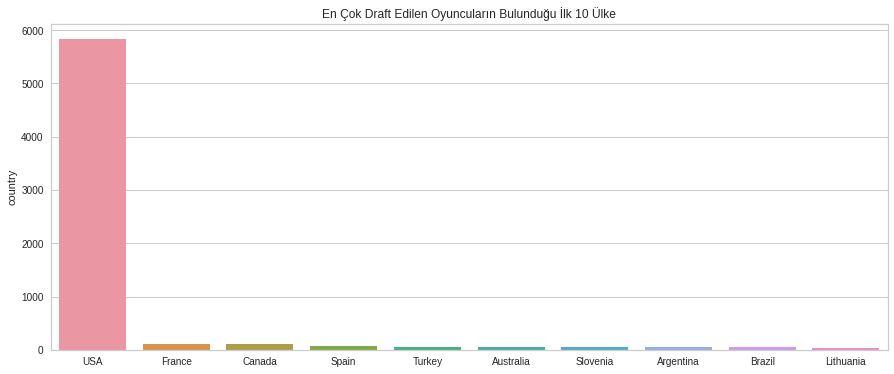

In [64]:
plt.figure(figsize=(15,6))
plt.title('En Çok Draft Edilen Oyuncuların Bulunduğu İlk 10 Ülke')
sns.barplot(x=countries_top10.index, y=countries_top10)

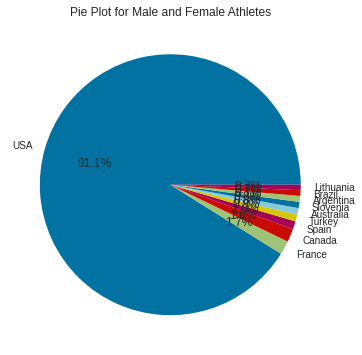

In [65]:
plt.figure(figsize=(15,6))
plt.title('En Çok Draft Edilen Oyuncuların Bulunduğu İlk 10 Ülkenin Yüzdeleri')
plt.pie(countries_top10, labels=countries_top10.index, autopct ='%1.1f%%');

Aşağıdaki tabloda ise, 1 numaralı sıradan hangi ülkeden ne kadar oyuncunun draft edildiği gözlemlenmiştir. Burada da çoğu oyuncunun Amerikalı olduğu görülmektedir.

In [66]:
df[df.draft_number == 1].country.value_counts().reset_index(name='Drafta Katılan Oyuncu Sayısı')

,index,Medal
0,USA,169
1,Australia,21
2,US Virgin Islands,19
3,Canada,9
4,Nigeria,8
5,China,6
6,Italy,5
7,Jamaica,4
8,Bahamas,2


Draft'a en çok katılım gösteren ilk 10 ülkenin %91.1'inin Amerika olduğu görülmektedir.

In [13]:
stat = ['gp', 'pts', 'reb', 'ast', 'net_rating','age','player_height','player_weight']
pick = df.groupby(['draft_number'])[stat].mean().reset_index()
player = df.groupby(['player_name','draft_number'])[stat].mean().reset_index()

Analizin kalan kısmı için önemli sayılabilecek değişkenler ayrı bir veriseti olarak tanımlanmıştır. Aynı zamanda draft_number başına ve oyuncu başına düşen ortalama istatistikleri ele alan iki ayrı veriseti tanımlanmıştır.

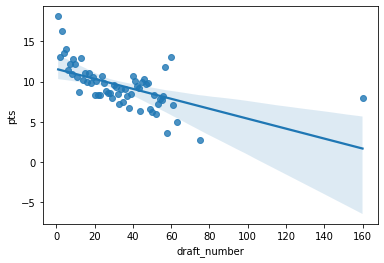

In [14]:
sns.regplot(x='draft_number',y='pts',data=pick)
plt.show()

En yüksek sayı ortalamasına sahip olanların Draft'ta ilk sıralardan seçilmiş olması beklenir. Çizdirilen grafikte de görüldüğü üzere, genel olarak daha yüksek sayı ortalamasına sahip oyuncuların Draft'ta ilk sıralardan seçildiği gözlemlenmektedir.
Ancak yukarıdaki grafikte görüldüğü üzere, draft sırası 61'den yukarıda olan gözlemler görülmektedir. Bu mümkün olan bir durum değildir. O yüzden verisetinden draft sırası 61'den yüksek olan gözlemler çıkarılacaktır.

In [146]:
pick.drop(pick[pick.draft_number>61].index, inplace=True)

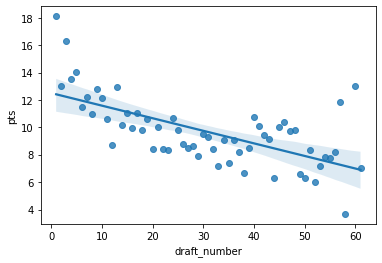

In [147]:
sns.regplot(x='draft_number',y='pts',data=pick)
plt.show()

Draft sırası 61'den yukarıda olan gözlemler çıkarıldıktan sonra, yeni grafiğimiz yukarıdaki gibi anlamlı bir şekilde çıkmıştır.

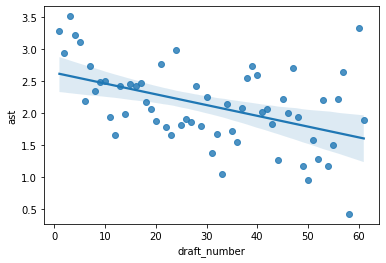

In [148]:
sns.regplot(x='draft_number',y='ast',data=pick)
plt.show()

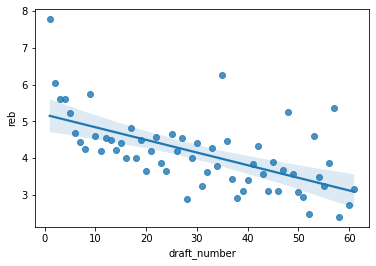

In [149]:
sns.regplot(x='draft_number',y='reb',data=pick)
plt.show()

Aynı şekilde rebound ve asist ortalamalarına ait değişkenler de ele alındığında, ilk sıralardan draft edilen oyuncuların asist ve rebound ortalamaları sonradan seçilenlere göre daha yüksektir.

İlk sıradan draft edilen oyuncular aşağıda net_rating sonuçlarına göre sıralanmıştır.

In [167]:
player[player.draft_number==1].sort_values('net_rating')

,player_name,draft_number,gp,pts,reb,ast,net_rating,age,player_height,player_weight
64,Anthony Bennett,1,54.500000,4.700000,3.400000,0.550000,-11.300000,21.500000,203.200000,114.305184
953,Michael Olowokandi,1,76.000000,8.825000,7.175000,0.675000,-6.125000,27.000000,213.360000,124.737800
67,Anthony Edwards,1,72.000000,19.300000,4.700000,2.900000,-5.000000,19.000000,193.040000,102.058200
815,Kwame Brown,1,67.833333,7.050000,5.766667,0.883333,-2.683333,23.833333,210.820000,115.439164
48,Andrea Bargnani,1,73.400000,15.160000,4.860000,1.220000,-2.200000,23.000000,213.360000,113.398000
57,Andrew Wiggins,1,75.000000,19.628571,4.485714,2.428571,-2.085714,23.000000,202.474286,89.876015
914,Markelle Fultz,1,72.000000,12.100000,3.300000,5.100000,-1.700000,22.000000,190.500000,94.800728
436,Elton Brand,1,74.461538,16.469231,8.815385,2.146154,-1.646154,27.769231,204.176923,117.410545
338,Deandre Ayton,1,70.000000,15.350000,10.400000,1.600000,-0.900000,21.000000,213.360000,113.398000
704,John Wall,1,75.166667,18.766667,4.483333,9.333333,-0.500000,23.166667,193.040000,89.584420


Görüldüğü üzere, genellikle 1 numaradan seçilen oyuncular şu ana kadar çok etkili kariyer geçirmiş oyunculardan oluşuyor. Fakat bu durumu sadece net_rating sonucuna göre yapmamak gerekiyor. Aksi takdirde çok anlamlı bir yorum olmayacaktır.
Örneğin Greg Oden'a bakıldığı zaman, net_rating sonucu en yüksek olan oyunculardan biri. Ancak sayı istatistiğine baktığımızda, takıma katkısının çok az olduğu görülmektedir. Buradan bu oyuncunun "garbage time" denilen zamanlarda daha çok görev aldığı, takımı zaten çok farklı bir şekilde önde olduğu durumlarda, yani maçın sonucunun zaten belli olduğu durumlarda görev aldığı ve bu sayede net_rating sonucunun yüksek çıktığı görülmektedir. Nitekim sakatlıktan dolayı daha sonra pek çok maç daha kaçırmış ve az süre almıştır.
Bir başka örnek olarak Anthony Bennett'in ilk sıradan seçilmesine rağmen ilk sıradan draft edilen oyuncular arasında net_rating'inin en kötü değere sahip olduğu görülmektedir.


Şimdi ise, ilk sıradan draft edilen oyuncuların fiziksel özelliklerine göre bir yorum yapılacaktır.

In [15]:
player[player.draft_number==1].sort_values('player_height')

,player_name,draft_number,gp,pts,reb,ast,net_rating,age,player_height,player_weight
32,Allen Iverson,1,71.818182,27.081818,3.663636,6.236364,0.900000,28.272727,182.880000,76.079749
362,Derrick Rose,1,63.555556,18.388889,3.322222,5.344444,0.388889,26.333333,189.935556,87.694453
825,Kyrie Irving,1,62.444444,22.600000,3.777778,5.677778,2.100000,24.111111,190.217778,87.442458
917,Markelle Fultz,1,72.000000,12.100000,3.300000,5.100000,-1.700000,22.000000,190.500000,94.800728
705,John Wall,1,75.166667,18.766667,4.483333,9.333333,-0.500000,23.166667,193.040000,89.584420
67,Anthony Edwards,1,72.000000,19.300000,4.700000,2.900000,-5.000000,19.000000,193.040000,102.058200
838,Larry Johnson,1,70.250000,12.225000,5.475000,2.225000,2.250000,30.000000,200.660000,112.944408
504,Glenn Robinson,1,71.333333,21.483333,6.250000,2.850000,-0.150000,27.166667,200.660000,104.704153
1417,Zion Williamson,1,61.000000,27.000000,7.200000,3.700000,2.100000,20.000000,200.660000,128.820128
57,Andrew Wiggins,1,75.000000,19.628571,4.485714,2.428571,-2.085714,23.000000,202.474286,89.876015


İlginçtir ki, ilk sıradan draft edilen oyuncuların sadece 7 tanesi Point Guard pozisyonunda oynamaktadır. Takımların genel tercihi, Forvet ya da Center pozisyonunda oynayan oyunculardan ve daha size'lı oyunculardan yana olmuştur.

Son olarak, oyuncuların sayı ortalamaları ve draft sırası değişkenleri ile KMeans kümeleme analizi yapılacaktır.

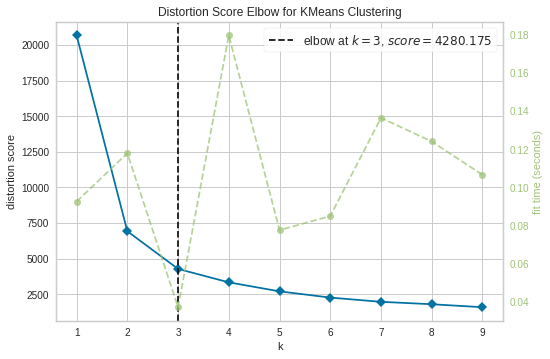

In [52]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(pick)
visualizer.poof()

İlk olarak Elbow Yöntemi ile optimum küme sayısı belirlenmiştir. Optimum küme sayısı 3 olarak bulunmuştur ve kümeleme analizi buna göre yapılacaktır

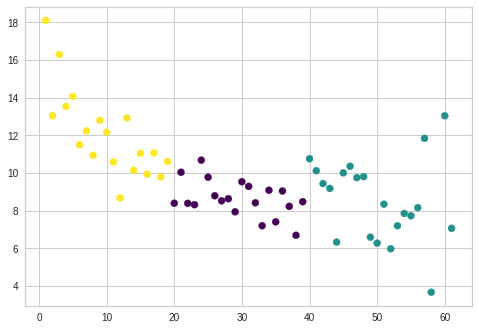

In [53]:
kmeans = KMeans(n_clusters=3)
k_fit = kmeans.fit(pick)
kumeler = k_fit.labels_
plt.scatter(pick.iloc[:,0], pick.iloc[:,2], c = kumeler, s=50, cmap ="viridis")

Kümeleme sonucunda yukarıdaki grafikte görüldüğü üzere, draft sırası sonlara doğru gittikçe, oyuncuların sayı ortalamasının da daha düşük olduğu gözlemlenmiştir.